In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

# Set style for Seaborn charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
import pandas as pd

df = pd.read_csv("cleaned_cyclistic.csv",
                 engine='python',
                 on_bad_lines='skip')
print(df.shape)
df.head()


(38274, 15)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,743252713F32516B,classic_bike,2024-04-22 19:08:21,2024-04-22 19:12:56,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,41.878119,-87.643948,member,4.583333,Monday
1,BE90D33D2240C614,electric_bike,2024-04-11 06:19:24,2024-04-11 06:22:21,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877722,-87.654959,41.878119,-87.643948,member,2.950000,Thursday
2,D47BBDDE7C40DD61,classic_bike,2024-04-20 11:13:13,2024-04-20 11:29:31,Sheridan Rd & Montrose Ave,TA1307000107,Ashland Ave & Belle Plaine Ave,13249,41.961670,-87.654640,41.956057,-87.668835,member,16.300000,Saturday
3,6684E760BF9EA9B5,classic_bike,2024-04-04 18:39:20,2024-04-04 18:43:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,41.878119,-87.643948,member,3.766667,Thursday
4,CA9EFC0D24C24A27,electric_bike,2024-04-19 19:30:20,2024-04-19 20:07:42,Sheridan Rd & Montrose Ave,TA1307000107,Stetson Ave & South Water St,TA1308000029,41.961613,-87.654615,41.886835,-87.622320,member,37.366667,Friday


In [3]:
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', dayfirst=False)
df['month'] = df['started_at'].dt.month_name()
df['hour'] = df['started_at'].dt.hour

# **Visualization 1 –**

Number of Rides by User Type

 ***Insight*** :  Shows overall usage distribution.

/tmp/ipython-input-1452261732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_casual', palette='Set2')


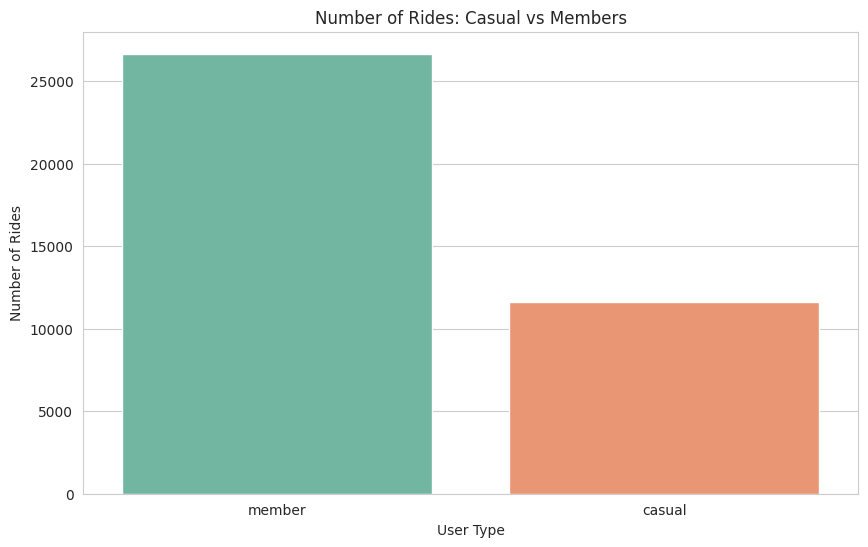

In [4]:
sns.countplot(data=df, x='member_casual', palette='Set2')
plt.title('Number of Rides: Casual vs Members')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.savefig('rides_by_user_type.png', dpi=300, bbox_inches='tight')
plt.show()


### **Visualization 2** –  Average Ride Length by User Type
Insight: Casual riders usually have longer trips.

/tmp/ipython-input-276619991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ride, x='member_casual', y='ride_length', palette='Set1')


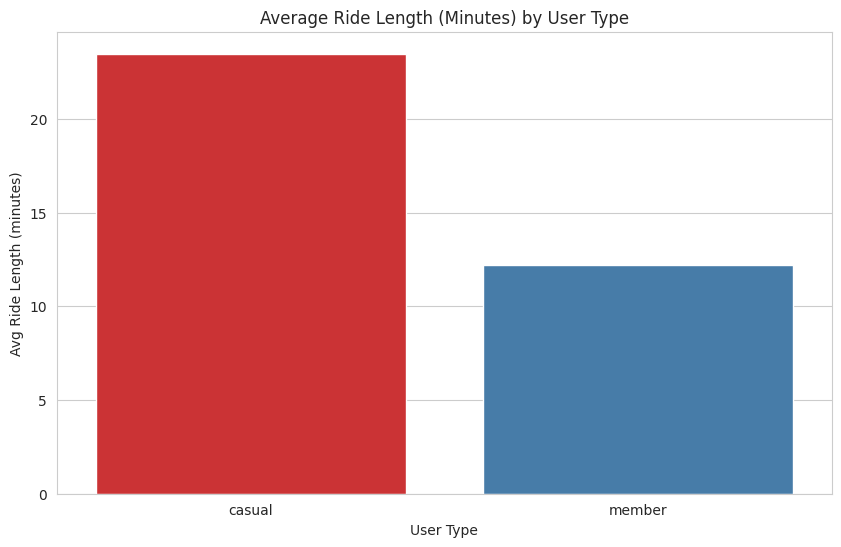

In [5]:
avg_ride = df.groupby('member_casual')['ride_length'].mean().reset_index()

sns.barplot(data=avg_ride, x='member_casual', y='ride_length', palette='Set1')
plt.title('Average Ride Length (Minutes) by User Type')
plt.xlabel('User Type')
plt.ylabel('Avg Ride Length (minutes)')
plt.savefig('Average Ride Length_user_type.png', dpi=300, bbox_inches='tight')
plt.show()


#Visualization 3 – Rides by Day of the Week



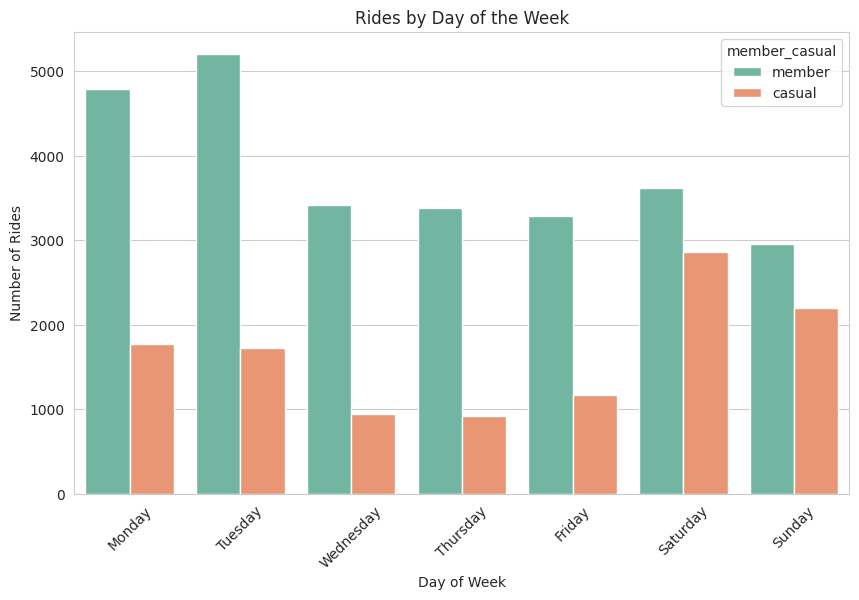

In [6]:

# Order days for proper visualization
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

sns.countplot(data=df, x='day_of_week', hue='member_casual', palette='Set2')
plt.title('Rides by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.savefig('Rides by Day of the Week.png', dpi=300, bbox_inches='tight')
plt.show()


Insight:

Casual riders ride more on weekends (leisure trips).

Members ride mostly on weekdays (commuting).

#Visualization 4 – Average Ride Length by Day of the Week

/tmp/ipython-input-233723877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_day = df.groupby(['day_of_week','member_casual'])['ride_length'].mean().reset_index()


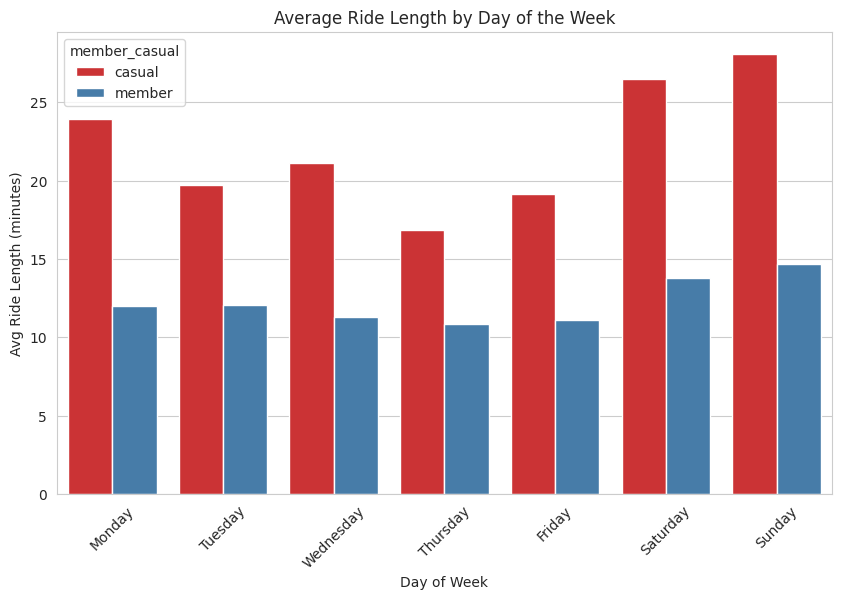

In [7]:

avg_by_day = df.groupby(['day_of_week','member_casual'])['ride_length'].mean().reset_index()

sns.barplot(data=avg_by_day, x='day_of_week', y='ride_length', hue='member_casual', palette='Set1')
plt.title('Average Ride Length by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Ride Length (minutes)')
plt.xticks(rotation=45)
plt.savefig('Average Ride Length by Day of the Week.png', dpi=300, bbox_inches='tight')
plt.show()




Insight: Casual riders take longer rides on weekends.

#Visualization 5 – Monthly Ride Trends

/tmp/ipython-input-3504483773.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = df.groupby(['month','member_casual']).size().reset_index(name='ride_count')


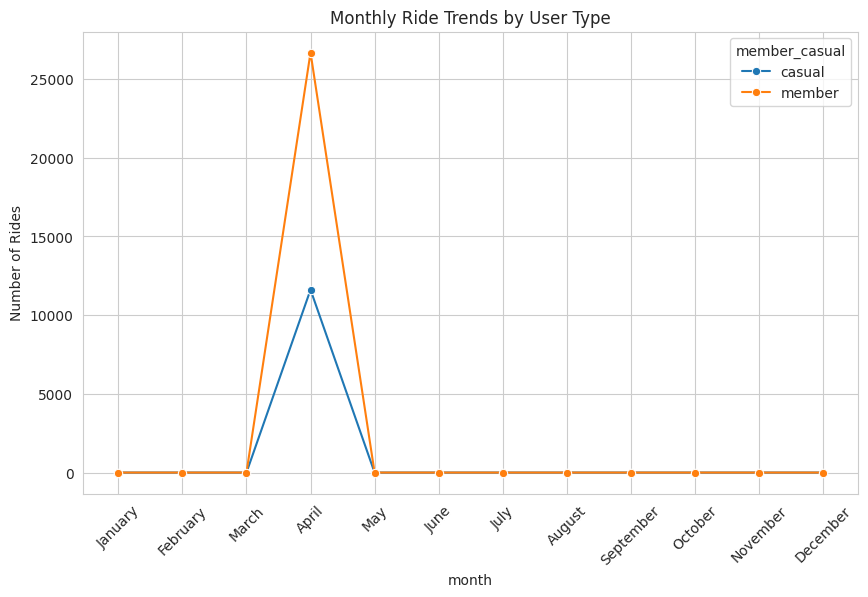

In [8]:
# Order months correctly
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

monthly_trend = df.groupby(['month','member_casual']).size().reset_index(name='ride_count')

sns.lineplot(data=monthly_trend, x='month', y='ride_count', hue='member_casual', marker='o')
plt.title('Monthly Ride Trends by User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.savefig('Monthly Ride Trends by User Type.png', dpi=300, bbox_inches='tight')
plt.show()


Insight: Shows seasonal trends and peak riding months.